# Chapter 3 Exercises

:::{exercise}
:label: ch3-ex-radauIA-order

Determine the order of the DIRK shown below.

$$ \begin{array}{c|cc}
    1/4 & 1/4 \\
    3/4 & 1/2 & 1/4 \\ \hline
    & 1/2 & 1/2
\end{array} $$
:::

::::{solution} ch3-ex-radauIA-order
:class: dropdown

Checking the $B(k)$ condition

$$ \begin{align*}
    B(1) &= b_1 + b_2 = \frac{1}{2} + \frac{1}{2} = 1, \\
    B(2) &= b_1c_1 + b_2c_2 = \frac{1}{2} \left(\frac{1}{4}\right) + \frac{1}{2}\left(\frac{3}{4}\right) = \frac{1}{2}, \\
    B(3) &= b_1c_1^2 + b_2c_2^2 = \frac{1}{2} \left(\frac{1}{16}\right) + \frac{1}{2}\left(\frac{9}{16}\right) = \frac{5}{16},
\end{align*} $$

so the $B(k)$ condition is satisfied up to $k=2$. Checking the $C(1)$ condition

$$ \begin{align*}
    \ell &= 1, & i &= 1: & LHS &= a_{11} + a_{12} = \frac{1}{4} + 0 = \frac{1}{4}, \\
    &&&& RHS &= c_1 = \frac{1}{4}, \\
    \ell &= 1, & i &= 2: & LHS &= a_{21} + a_{22} = \frac{1}{2} + \frac{1}{4} = \frac{3}{4}, \\
    &&&& RHS &= c_2 = \frac{3}{4}
\end{align*} $$

so the $C(1)$ condition is satisfied. Checking the $D(1)$ condition

$$ \begin{align*}
    \ell &= 1, & i &= 1: & LHS &= b_1a_{11} + b_2a_{21} = \frac{1}{2}\left(\frac{1}{4}\right) + \frac{1}{2}\left(\frac{1}{2}\right) = \frac{3}{8}, \\
    &&&& RHS &= b_1(1 - c_1) = \frac{1}{2}\left(1 - \frac{1}{4}\right) = \frac{3}{8}, \\
    \ell &= 1, & i &= 2: & LHS &= b_1a_{12} + b_2a_{22} = \frac{1}{2}(0) + \frac{1}{2}\left(\frac{1}{4}\right) = \frac{1}{8}, \\
    &&&& RHS &= b_2(1 - c_2) = \frac{1}{2}\left(1 - \frac{3}{4}\right) = \frac{1}{8}.
\end{align*} $$

so the $D(1)$ conditions is satisfied. Therefore this method is a second-order method.
::::

:::{exercise}
:label: ch3-ex-radauIIA-derivation

Derive a third-order Radau IIA method.
:::

::::::{solution} ch3-ex-radauIIA-derivation
:class: dropdown

A third-order Radau IIA method has $s=2$ stages with $c_2 = 1$. The value of $c_1$ is the other root of $0 = P_2(t) - P_1(t)$

$$ \begin{align*}
    0 &= 1 + 6(x - 1) + 6(x - 1)^2 - 1 - 2(x - 1) \\
    &= 6x - 6 + 6x^2 - 12x + 6 - 2x + 2 \\
    &= 6x^2 - 8x + 2, \\
    \therefore x &= \frac{8 \pm 4}{12} = \frac{1}{3}, 1,
\end{align*} $$

so $c_1 = \frac{1}{3}$. The values of $b_i$ are chosen to satisfy the $B(4)$ condition

$$ \begin{align*}
    b_1 + b_2 &= 1, \\
    \frac{1}{3}b_1 + b_2 &= \frac{1}{2},
\end{align*} $$

so $b_1 = \frac{3}{4}$ and $b_2 = \frac{1}{4}$. The $a_{ij}$ coefficients satisfy the $C(2)$ condition

$$ \begin{align*}
    a_{11} + a_{12} &= \frac{1}{3}, \\
    a_{21} + a_{22} &= 1, \\
    \frac{1}{3}a_{11} + a_{12} &= \frac{1}{18}, \\
    \frac{1}{3}a_{21} + a_{22} &= \frac{1}{2}. 
\end{align*} $$

These are solved to give $a_{11} = \frac{5}{12}$, $a_{12} = -\frac{1}{12}$, $a_{21} = \frac{3}{4}$ and $a_{22} = \frac{1}{4}$ so the third-order Radau IIA method is

$$ \begin{align*}
    \begin{array}{c|cc}
        1/3 & 5/12 & -1/12 \\
        1 & 3/4 & 1/4 \\ \hline
        & 3/4 & 1/4
    \end{array}
\end{align*} $$

Code

:::::{tab-set}
::::{tab-item} Python
```python
import sympy as sp
  
# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2 = sp.symbols("a11, a12, a21, a22, b1, b2, c1, c2")

# Define Legendre polynomial
def P(s):
    Ps, x = 0, sp.symbols('x')
    for k in range(s + 1):
        Ps += sp.binomial(s, k) * sp.binomial(s + k, k) * (x - 1) ** k
    return Ps


# Calculate c values
c1, c2 = sp.solve(P(2) - P(1))
display(sp.solve(P(2) - P(1)))

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = a11 + a12 - c1
eq4 = a21 + a22 - c2
eq5 = a11 * c1 + a12 * c2 - sp.Rational(1,2) * c1 ** 2
eq6 = a21 * c1 + a22 * c2 - sp.Rational(1,2) * c2 ** 2

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))
:::
::::

::::{tab-item} MATLAB
:::
syms a11 a12 a21 a22 b1 b2 c1 c2

% Calculate c coefficients
c = solve(P(2) - P(1))
c1 = c(1);
c2 = c(2);

% Define order conditions
eq1 = b1 + b2 == 1;
eq2 = b1 * c1 + b2 * c2 == 1/2;
eq3 = a11 + a12 == c1;
eq4 = a21 + a22 == c2;
eq5 = a11 * c1 + a12 * c2 == 1/2 * c1^2;
eq6 = a21 * c1 + a22 * c2 == 1/2 * c2^2;

% Solve order conditions
solve(eq1, eq2, eq3, eq4, eq5, eq6)

% -------------------------------------------------------------------
function Ps = P(s)

syms x
Ps = 0;
for k = 0 : s
    Ps = Ps + nchoosek(s, k) * nchoosek(s + k, k) * (x - 1) ^ k;
end

end
:::
::::
:::::
::::::

In [1]:
import sympy as sp
  
# Define symbolic variables
a11, a12, a21, a22, b1, b2, c1, c2 = sp.symbols("a11, a12, a21, a22, b1, b2, c1, c2")

# Define Legendre polynomial
def P(s):
    Ps, x = 0, sp.symbols('x')
    for k in range(s + 1):
        Ps += sp.binomial(s, k) * sp.binomial(s + k, k) * (x - 1) ** k
    return Ps


# Calculate c values
c1, c2 = sp.solve(P(2) - P(1))
display(sp.solve(P(2) - P(1)))

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b1 * c1 + b2 * c2 - sp.Rational(1,2)
eq3 = a11 + a12 - c1
eq4 = a21 + a22 - c2
eq5 = a11 * c1 + a12 * c2 - sp.Rational(1,2) * c1 ** 2
eq6 = a21 * c1 + a22 * c2 - sp.Rational(1,2) * c2 ** 2

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))

[1/3, 1]

{a11: 5/12, a12: -1/12, a21: 3/4, a22: 1/4, b1: 3/4, b2: 1/4}

:::{exercise}
:label: ch3-ex-radauIIA-step1

Calculate the first step of the third-order Radau IIA method derived in {numref}`ch3-ex-radauIIA-derivation` to solve the following initial value problem using a step length of $h=0.4$ and a accuracy tolerance of $tol = 10^{-4}$

\begin{align*}
  y' =t - y, \qquad t \in [0,2], \qquad y(0) = 1.
\end{align*}
:::

::::{solution} ch3-ex-radauIIA-step1
:class: dropdown

The Butcher tableau for the Radau IIA method is

\begin{align*}
    \begin{array}{c|cc}
        1/3 & 5/12 & -1/12 \\
        1 & 3/4 & 1/4 \\
        \hline
        & 3/4 & 1/4
    \end{array}
\end{align*}

The stage values are

\begin{align*}
    Y_1 &= y_n + h (\tfrac{5}{12} f(t_n + \tfrac{1}{3} h, Y_1) - \tfrac{1}{12} f(t_n + h, Y_2)) \\
    Y_2 &= y_n + h (\tfrac{3}{4} f(t_n + \tfrac{1}{3} h, Y_1) + \tfrac{1}{4} f(t_n + h, Y_2)),
\end{align*}

and since $f(t,y) = t - y $ then

\begin{align*}
    Y_1 &= y_n + h (\tfrac{5}{12} (t_n + \tfrac{1}{3} h - Y_1) - \tfrac{1}{12} (t_n + h - Y_2)) \\
    Y_2 &= y_n + h (\tfrac{3}{4} (t_n + \tfrac{1}{3} h - Y_1) + \tfrac{1}{4} (t_n + h - Y_2)).
\end{align*}

For this problem $y(0) = 1$ and $h = 0.4$. Using starting estimates of $Y_1 = Y_2 = 1$ the iteration values are

| $k$ | $Y_1^{(k)}$ | $Y_2^{(k)}$ | Max difference |
|:---:|:-----------:|:-----------:|:----------:|
|  0  |   1.000000  |   1.000000  |     -      |
|  1  |   0.875556  |   0.717333  |  2.83e-01  |
|  2  |   0.886874  |   0.742204  |  2.49e-02  |
|  3  |   0.885817  |   0.740035  |  2.17e-03  |
|  4  |   0.885921  |   0.740220  |  1.86e-04  |
|  5  |   0.885909  |   0.740205  |  1.52e-05  |

The solution over the first step is

\begin{align*}
    y_1 &= y_0 + h (\tfrac{3}{4} (t_0 + \tfrac{1}{3}(0.4) - Y_1) + \tfrac{1}{4} (t_0 + 0.4 - Y_2)), \\
    &= 1 + 0.4 (\tfrac{3}{4} (0 + \tfrac{1}{3}(0.4) - 0.885909) + \tfrac{1}{4} (0 + 0.4 - 0.740205)), \\
    &= 0.740207.
\end{align*}
::::

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

def radauIIA(f, tspan, y0, h, tol=1e-6): 

    # Initialise t and y arrays
    t = np.empty(100000)
    y = np.empty((100000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps
    n = 0
    neq = len(y0)
    while t[n] < tspan[1]:

        # Ensure t does not exceed tspan[1]
        h = min(h, tspan[1] - t[n])

        # Calculate stage values
        Y1, Y2, Y1prev, Y2prev = np.ones(neq), np.ones(neq), np.ones(neq), np.ones(neq)
        for k in range(10):
            Y1 = y[n,:] + h * (5/12 * f(t[n] + 1/3 * h, Y1) - 1/12 * f(t[n] + h, Y2))
            Y2 = y[n,:] + h * (3/4 * f(t[n] + 1/3 * h, Y1) + 1/4 * f(t[n] + h, Y2))
            if max(np.amax(abs(Y1 - Y1prev)), np.amax(abs(Y2 - Y2prev))) < tol:
                break
            Y1prev, Y2prev = Y1, Y2

        # Calculate Euler method
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
        n += 1

        print(f"| {t[n]:0.2f} | {y[n,0]:0.6f} | {Y1[0]:0.6f} | {Y2[0]:0.6f} | {k+1:2d} |")

    return t[:n+1], y[:n+1,:]


# Define ODE function
def f(t, y):
    return t - y

def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length
tol = 1e-4      # convergence tolerance

# Solve IVP using the IRK method
t, y = radauIIA(f, tspan, y0, h, tol)

| 0.40 | 0.600000 | 0.885909 | 0.740205 |  5 |
| 0.80 | 0.520000 | 0.584888 | 0.604118 |  6 |
| 1.20 | 0.632000 | 0.564272 | 0.682468 |  6 |
| 1.60 | 0.859200 | 0.711898 | 0.889479 |  6 |
| 2.00 | 1.155520 | 0.960471 | 1.173688 |  6 |


:::{exercise}
:label: ch3-ex-radauIIA

The exact solution to the IVP in {numref}`ch3-ex-radauIIA-step1` is $y = t + 2e^{-t} - 1$. Write a program to this initial value problem over the full domain, produce a table comparing the numerical and exact solutions and plot the numerical solutions and exact solutions on the same set of axes.
:::

::::::{solution} ch3-ex-radauIIA
:class: dropdown

Table

:::
|  t   |     y     |   Exact   |   Error  |
|:----:|:---------:|:---------:|:--------:|
| 0.00 |  1.000000 |  1.000000 | 0.00e+00 |
| 0.40 |  0.740207 |  0.740640 | 4.33e-04 |
| 0.80 |  0.698075 |  0.698658 | 5.83e-04 |
| 1.20 |  0.801801 |  0.802388 | 5.87e-04 |
| 1.60 |  1.003268 |  1.003793 | 5.25e-04 |
| 2.00 |  1.270232 |  1.270671 | 4.39e-04 |
:::

Plot 

:::{glue:figure} ex3.5_plot
:figwidth: 600
:::

:::::{tab-set}
::::{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def radauIIA(f, t, y, h): 

    # Calculate stage values
    Y1, Y2 = np.ones(len(y0)), np.ones(len(y0))
    Y1old, Y2old = np.ones(len(y0)), np.ones(len(y0))
    for k in range(10):
        Y1 = y + h * (5/12 * f(t + 1/3 * h, Y1) - 1/12 * f(t + h, Y2))
        Y2 = y + h * (3/4 * f(t + 1/3 * h, Y1) + 1/4 * f(t + h, Y2))

        if max(np.amax(abs(Y1 - Y1old)), np.amax(abs(Y2 - Y2old))) < 1e-4:
            break

        Y1old, Y2old = Y1, Y2

    return y + h / 4 * (3 * f(t + 1/3 * h, Y1) +  f(t + h,Y2))


# Define ODE function
def f(t, y):
    return t - y

def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length
tol = 1e-4      # convergence tolerance

# Solve IVP using the IRK method
t, y = solveIVP(f, tspan, y0, h, radauIIA)

# Print table of solution values
print("|  t   |     y     |   Exact   |   Error  |")
print("|:----:|:---------:|:---------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} | {abs(exact(t[n]) - y[n,0]):0.2e} |")

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Radau IIA")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
```
::::

::::{tab-item} MATLAB
```matlab
% Define ODE function and exact solution
f = @(t, y) t - y;
exact = @(t) t + 2 * exp(-t) - 1;

% Define IVP parameters
tspan = [0, 2];     % boundaries of the t domain
y0 = 1;             % initial value of the solution
h = 0.4;            % step length
tol = 1e-4;         % accuracy tolerance

% Calculate the solution to the IVP
[t, y] = solveIVP(f, tspan, y0, h, @radauIIA);

% Calculate exact solution for plotting
texact = linspace(tspan(1), tspan(2), 200);
yexact = exact(texact);

% Plot solution
plot(texact, yexact, 'k-', LineWidth=2)
hold on
plot(t, y, 'b-o', LineWidth=2, MarkerFaceColor='b')
hold off
axis padded
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', 'Radau IIA', Location='northwest', FontSize=12)

% --------------------------------------------------------------------
function [t, y] = solveIVP(f, tspan, y0, h, solver)

% Define t and y arrays
t = (tspan(1) : h : tspan(2));
y = zeros(length(t), length(y0));
y(1,:) = y0;

% Loop through the steps and calculate single step solver solution
for n = 1 : length(t) - 1
    y(n+1,:) = solver(f, t(n), y(n,:), h);
end

end

% --------------------------------------------------------------------
function ynew = radauIIA(f, t, y, h)

neq = length(y);
Y1 = ones(neq);
Y2 = ones(neq);
Y1old = ones(neq);
Y2old = ones(neq);
for k = 1 : 10
    Y1 = y + h * (5/12 * f(t + 1/3 * h, Y1) - 1/12 * f(t + h, Y2));
    Y2 = y + h * (3/4 * f(t + 1/3 * h, Y1) + 1/4 * f(t + h, Y2));
    if max(max(abs(Y1 - Y1old)), max(abs(Y2 - Y2old))) < 1e-4
        break
    end
    Y1old = Y1;
    Y2old = Y2;
end
ynew = y + h / 4 * (3 * f(t + 1/3 * h, Y1) + f(t + h, Y2));

end
```
::::
:::::
::::::

|  t   |     y     |   Exact   |   Error  |
|:----:|:---------:|:---------:|:--------:|
| 0.00 |  1.000000 |  1.000000 | 0.00e+00 |
| 0.40 |  0.740207 |  0.740640 | 4.33e-04 |
| 0.80 |  0.698075 |  0.698658 | 5.83e-04 |
| 1.20 |  0.801801 |  0.802388 | 5.87e-04 |
| 1.60 |  1.003268 |  1.003793 | 5.25e-04 |
| 2.00 |  1.270232 |  1.270671 | 4.39e-04 |


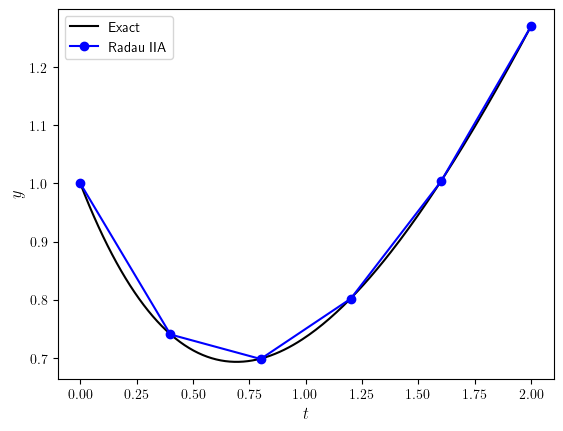

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def radauIIA(f, t, y, h): 

    # Calculate stage values
    Y1, Y2 = np.ones(len(y0)), np.ones(len(y0))
    Y1old, Y2old = np.ones(len(y0)), np.ones(len(y0))
    for k in range(10):
        Y1 = y + h * (5/12 * f(t + 1/3 * h, Y1) - 1/12 * f(t + h, Y2))
        Y2 = y + h * (3/4 * f(t + 1/3 * h, Y1) + 1/4 * f(t + h, Y2))

        if max(np.amax(abs(Y1 - Y1old)), np.amax(abs(Y2 - Y2old))) < 1e-4:
            break

        Y1old, Y2old = Y1, Y2

    return y + h / 4 * (3 * f(t + 1/3 * h, Y1) +  f(t + h,Y2))


# Define ODE function
def f(t, y):
    return t - y

def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length
tol = 1e-4      # convergence tolerance

# Solve IVP using the IRK method
t, y = solveIVP(f, tspan, y0, h, radauIIA)

# Print table of solution values
print("|  t   |     y     |   Exact   |   Error  |")
print("|:----:|:---------:|:---------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} | {abs(exact(t[n]) - y[n,0]):0.2e} |")

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Radau IIA")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("ex3.5_plot", fig, display=False)